# Computer Vision Libraries in pytorch

* `torchvision` - base libray for the computer vision
* `torchvision.datasets` - get datasets and data loading function for computer vision
* `torchvision.models` - get pretrained computer vision model that you can leverage for you own problems.
* `torchvision.transformers` - function for manipulating your vision data (images) to be suitable for use with models
* `torch.utils.data.Dataset` - Base dataset class for Pytorch
* `torch.utils.data.DataLoader` - Create a python iterable over a dataset

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

plt.rcParams["savefig.bbox"] = 'tight'

print(torch.__version__)
print(torchvision.__version__)

1.13.1
0.14.1


# Some Transformation

In [2]:
from PIL import Image
from pathlib import Path
import numpy as np

import torch
from torchvision import transforms

In [3]:
orig_image = Image.open(Path("image") / "astronaut.png")

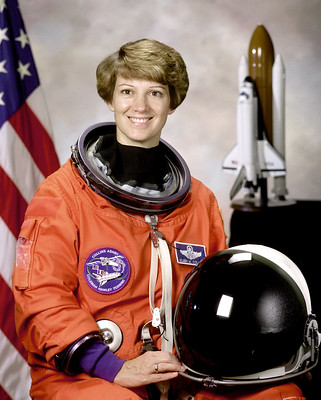

In [4]:
orig_image

In [5]:
type(transforms.Pad(padding=50)(orig_image))

PIL.Image.Image

In [6]:
def plot(imgs: list, with_orig=True, row_title=None, **kwargs):
    if not isinstance(imgs[0], list):
        imgs = [imgs]
    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig

    fig, axs = plt.subplots(num_rows, num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_image] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    if with_orig:
        axs[0, 0].set(title="Original Image")
        axs[0, 0].title.set_size(8)

    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

## Pad

1. it accepts both `PIL image and Tensor`
2. if it is tensor then expect shape [...,H,W]

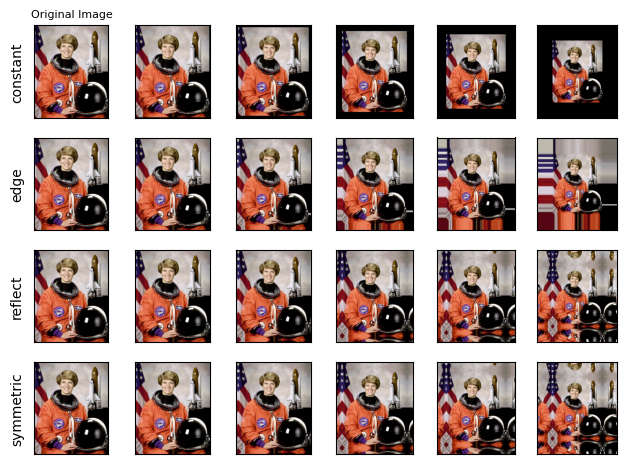

In [7]:
padding_mode = ["constant", "edge", "reflect", "symmetric"]
padding = (3, 10, 30, 50, 100)

padded_imgs = [[transforms.Pad(padding_mode=mode, padding=pad)(orig_image)
                for pad in padding]
               for mode in padding_mode]
plot(padded_imgs, with_orig=True, row_title=padding_mode)

## Resize

1. it accepts both `PIL image and Tensor`
2. if it is tensor then expect shape [...,H,W]

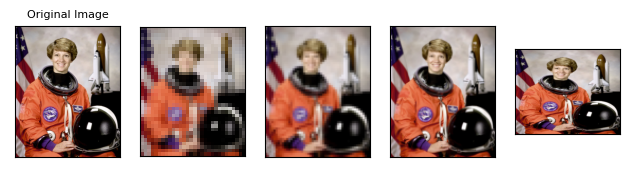

In [8]:
resized_imgs = [transforms.Resize(size=size)(orig_image)
                for size in (30, 50, 100, orig_image.size)]
plot(resized_imgs)

## Center Crop

1. it accepts both `PIL image and Tensor`
2. if it is tensor then expect shape [...,H,W]

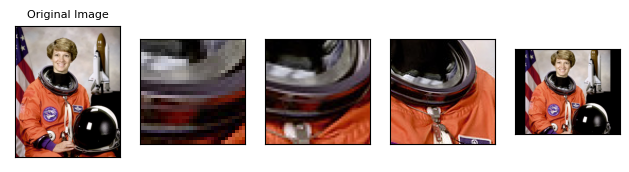

In [9]:
center_crop = [transforms.CenterCrop(size=size)(orig_image)
               for size in (30, 50, 100, orig_image.size)]
plot(center_crop)

## Five Crop

1. it accepts both `PIL image and Tensor`
2. if it is tensor then expect shape [...,H,W]

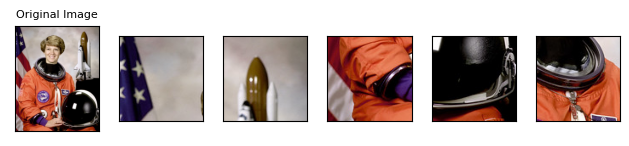

In [10]:
(top_left, top_right, left_bottom, bottom_right, center) = transforms.FiveCrop(size=(100, 100))(orig_image)
plot([top_left, top_right, left_bottom, bottom_right, center])

## Grey Scale

1. it accepts both `PIL image and Tensor`
2. if it is tensor then expect shape [...,3,H,W]

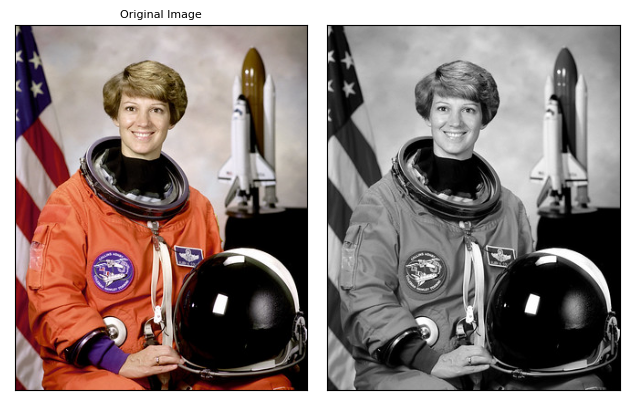

In [11]:
gray_image = transforms.Grayscale()(orig_image)
plot([gray_image], cmap="gray")

## Random Transformer

### Color Jitter

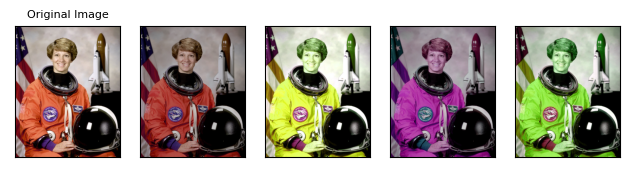

In [12]:
jitted_imgs = [transforms.ColorJitter(brightness=0.5, hue=.3)(orig_image)
               for _ in range(4)]
plot(jitted_imgs)

### Gaussian Blur

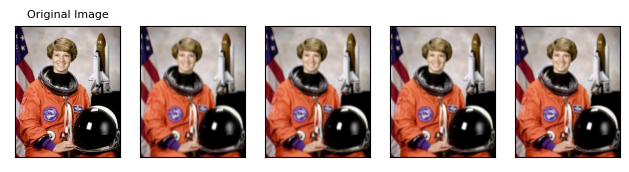

In [13]:
blur = transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5))
blur_imgs = [blur(orig_image) for _ in range(4)]
plot(blur_imgs)

### Random Perspective

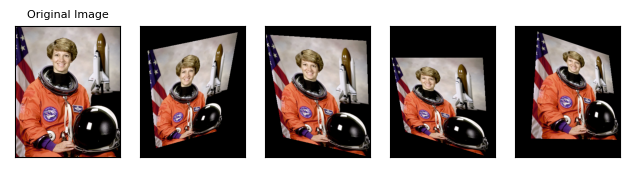

In [14]:
perspective_transformer = transforms.RandomPerspective(distortion_scale=0.5, p=1.0)
perspective_imgs = [perspective_transformer(orig_image) for _ in range(4)]
plot(perspective_imgs)

### Random Rotation

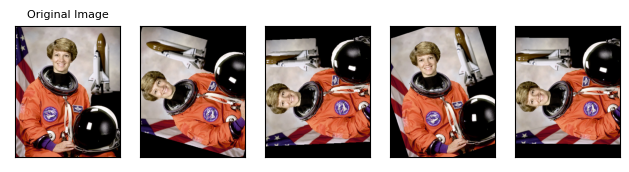

In [15]:
rotation_transformer = transforms.RandomRotation(degrees=(0, 180))
rotation_imgs = [rotation_transformer(orig_image) for _ in range(4)]
plot(rotation_imgs)

# Getting a dataset

1. All dataset is subclass of `torch.utils.data.Dataset` they have `__getitem__` and `__len__` method implemented.



In [16]:
train_data = datasets.FashionMNIST(
    root="data",  #? where to download data
    train=True,
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,  # to download the test data
    download=True,
    transform=transforms.ToTensor(),
    target_transform=None
)

In [17]:
type(train_data), type(test_data)

(torchvision.datasets.mnist.FashionMNIST,
 torchvision.datasets.mnist.FashionMNIST)

In [18]:
len(train_data), len(test_data)

(60000, 10000)

In [19]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [20]:
train_data.data.shape, train_data.targets.shape

(torch.Size([60000, 28, 28]), torch.Size([60000]))

In [21]:
test_data.data.shape, train_data.targets.shape

(torch.Size([10000, 28, 28]), torch.Size([60000]))

In [22]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [23]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

## Plot some images

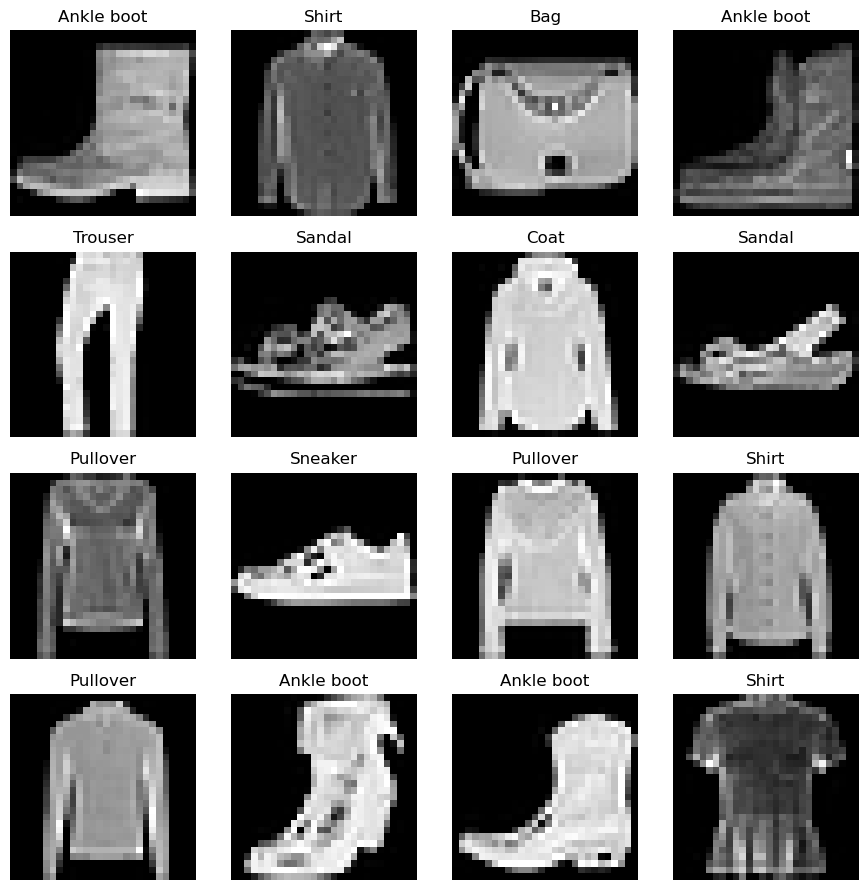

In [26]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)
plt.tight_layout()
plt.show()

## Prepare DataLoader

1. our data is in the form of PyTorch Datasets.
2. DataLoader turn dataset into python iterable.

We want ti turn our data into batches.

Why we need do this?
1. It is more computationally efficient as in your computing hardware may not fit the entire dataset at the time


In [27]:
train_data

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [28]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [29]:
from torch.utils.data import DataLoader

# setup the batch size
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE, shuffle=False)

In [30]:
type(train_dataloader), type(test_dataloader)

(torch.utils.data.dataloader.DataLoader,
 torch.utils.data.dataloader.DataLoader)

In [40]:
print(f"Length if train_dataloaders : {len(train_dataloader)} batches of {train_dataloader.batch_size}")
print(f"Length if test_dataloaders : {len(test_dataloader)} batches of {test_dataloader.batch_size}")

Length if train_dataloaders : 1875 batches of 32
Length if test_dataloaders : 313 batches of 32


In [37]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image shape : torch.Size([1, 28, 28])


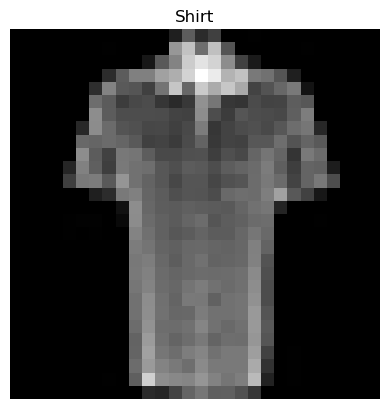

In [39]:
# shoe some sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("off")
print(f"Image shape : {img.shape}")

# Model 0 : Build a baseline model

Always start with baseline model. then increase the complexity of model to increase the accuracy ,by doing the lost of experiment.

In [41]:
# Create to flatten model
flatten_model = nn.Flatten()
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)

# print out what happened
print(f"Shape before flattening : {x.shape}")
print(f"Shape after flattening : {output.shape}")

Shape before flattening : torch.Size([1, 28, 28])
Shape after flattening : torch.Size([1, 784])


In [61]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)

In [62]:
model_0 = FashionMNISTModelV0(
    input_shape=784,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [63]:
dummy_x = torch.rand([1, 1, 28, 28])
model_0(dummy_x)

tensor([[-0.3297,  0.1382, -0.1471, -0.2725,  0.3004, -0.1084, -0.3225,  0.1975,
          0.2080,  0.2389]], grad_fn=<AddmmBackward0>)

## Setup loss function and optimizer and evaluation metrics

1. `Loss Function` -- `nn.CrossEntropyLoss()` since we are working with multi class data
2. `Optimiser` -- `torch.optim.SGD`
3. `Accuracy` -- `torchmetrics.Accuracy` since we are doing the classification.

In [64]:
from torchmetrics import Accuracy

In [65]:
help(Accuracy)

Help on class Accuracy in module torchmetrics.classification.accuracy:

class Accuracy(builtins.object)
 |  Accuracy(task: Literal['binary', 'multiclass', 'multilabel'], threshold: float = 0.5, num_classes: Optional[int] = None, num_labels: Optional[int] = None, average: Optional[Literal['micro', 'macro', 'weighted', 'none']] = 'micro', multidim_average: Literal['global', 'samplewise'] = 'global', top_k: Optional[int] = 1, ignore_index: Optional[int] = None, validate_args: bool = True, **kwargs: Any) -> torchmetrics.metric.Metric
 |  
 |  Computes `Accuracy`_
 |  
 |  .. math::
 |      \text{Accuracy} = \frac{1}{N}\sum_i^N 1(y_i = \hat{y}_i)
 |  
 |  Where :math:`y` is a tensor of target values, and :math:`\hat{y}` is a tensor of predictions.
 |  
 |  This module is a simple wrapper to get the task specific versions of this metric, which is done by setting the
 |  ``task`` argument to either ``'binary'``, ``'multiclass'`` or ``multilabel``. See the documentation of
 |  :mod:`BinaryAccu

In [66]:
# set up the loss function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

## Creating a function to time our experiments

Two of the main thing you'll often want to track are:
1. Model's performance
2. How fast it runs

In [67]:
from timeit import default_timer as timer


def print_train_time(start, end, device=None):
    total_time = end - start
    print(f"Train time on {device} : {total_time} seconds")
    return total_time

## Creating as training loop on batches of data

1. Loop through epochs
2. Loop through training batches , perform training steps, calculate the train loss per batch.
3. Loop through testing batch , perform testing step ,calculate teh test loss per batch
4. print out what happening
5. Time it all

In [68]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

# set the epochs
epochs = 3

# creating the training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n--------")
    ### Training
    train_loss = 0
    # add a loop to loop through the training batches
    for batch, (X_train, y_train) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X_train)

        # 2. Calculate the loss
        loss = loss_fn(y_pred, y_train)
        train_loss += loss

        # 3, optimiser zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()
        #? updating the weight once per batch

        if batch % 400 == 0:
            print(f"Looked at {batch * len(X_train)} /{len(train_dataloader.dataset)} samples.")

    # divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    #### testing loop
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            # 1. forward pass
            test_pred = model_0(X_test)
            test_loss += loss_fn(test_pred, y_test)

            # calculate the accuracy
            test_acc += accuracy_fn(test_pred.argmax(dim=1), y_test)

        test_loss /= len(test_dataloader)
        test_acc /= len(test_dataloader)

    # prnt wht happening
    print(f"\n Train Loss : {train_loss:.4f} | Test Loss :{test_loss:.4f} , Test acc: {test_acc:.2%}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(train_time_start_on_cpu,
                                            train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
--------
Looked at 0 /60000 samples.
Looked at 12800 /60000 samples.
Looked at 25600 /60000 samples.
Looked at 38400 /60000 samples.
Looked at 51200 /60000 samples.

 Train Loss : 0.5932 | Test Loss :0.5045 , Test acc: 82.34%
Epoch : 1
--------
Looked at 0 /60000 samples.
Looked at 12800 /60000 samples.
Looked at 25600 /60000 samples.
Looked at 38400 /60000 samples.
Looked at 51200 /60000 samples.

 Train Loss : 0.4778 | Test Loss :0.4846 , Test acc: 82.98%
Epoch : 2
--------
Looked at 0 /60000 samples.
Looked at 12800 /60000 samples.
Looked at 25600 /60000 samples.
Looked at 38400 /60000 samples.
Looked at 51200 /60000 samples.

 Train Loss : 0.4557 | Test Loss :0.4798 , Test acc: 83.48%
Train time on cpu : 32.84479830000055 seconds


# Make prediction and get Model 0 results

In [112]:
torch.manual_seed(42)


def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device):
    loss, acc = 0, 0
    with torch.inference_mode():
        for X_test, y_test in tqdm(data_loader):
            # put the data into device
            X_test, y_test = X_test.to(device), y_test.to(device)
            y_pred = model(X_test)

            loss += loss_fn(y_pred, y_test)
            acc += accuracy_fn(y_pred.argmax(dim=1), y_test)

        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__,
            "model_loss": loss.item(),
            "model_acc": acc.item() * 100}


model_0_results = eval_model(model_0, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn,
                             device="cpu")
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.4797830879688263,
 'model_acc': 83.47643613815308}

# Setup device agnostic code

In [72]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Building Model 1 : Building a better model with non-linearity

In [103]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
        )

    def forward(self, x):
        return self.layer_stack(x)


model_1 = FashionMNISTModelV1(input_shape=784, hidden_units=10, output_shape=len(class_names)).to(device)


## Set loss function , optimizer and accuracy

In [104]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

## Build the training and test loop as functions

In [105]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    ### Training step
    train_loss, train_acc = 0, 0

    # put the model into training mode
    model.train()

    for batch, (X_train, y_train) in enumerate(dataloader):
        X_train, y_train = X_train.to(device), y_train.to(device)

        # 1. forward pass
        y_pred = model(X_train)

        # 2. calculate the loss
        loss = loss_fn(y_pred, y_train)
        train_loss += loss
        train_acc += accuracy_fn(torch.softmax(y_pred, dim=1).argmax(dim=1),
                                 y_train)
        # 3. optimizer zero grad
        optimizer.zero_grad()

        # 4. loss backward
        loss.backward()

        # 5. optimizer step
        optimizer.step()
    # divide total train loss and acc by length of train dataloader
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"Train Loss : {train_acc:.5f} | Train Acc : {train_acc:.2%}")

In [106]:
def test_step(model: nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device = device):
    ### testing
    test_loss, test_acc = 0, 0

    model.eval()
    with torch.inference_mode():
        for X_test, y_test in data_loader:
            # put the data into device
            X_test = X_test.to(device)
            y_test = y_test.to(device)

            # 1. forward pass
            test_pred = model(X_test)

            # 2. calculate the loss
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(torch.softmax(test_pred, dim=1).argmax(dim=1),
                                    y_test)

        # adjust the metrics
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test Loss : {test_loss:.5f} | Test Acc : {test_acc:.2%}")

In [107]:
torch.manual_seed(42)

# measure time
from timeit import default_timer as timer

train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch} \n ------")
    train_step(model_1,
               dataloader=train_dataloader, loss_fn=loss_fn,
               accuracy_fn=accuracy_fn, optimizer=optimizer, device=device)
    test_step(model_1, data_loader=test_dataloader, loss_fn=loss_fn,
              accuracy_fn=accuracy_fn, device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0 
 ------
Train Loss : 0.77487 | Train Acc : 77.49%
Test Loss : 0.58734 | Test Acc : 79.44%
Epoch : 1 
 ------
Train Loss : 0.83290 | Train Acc : 83.29%
Test Loss : 0.46961 | Test Acc : 83.09%
Epoch : 2 
 ------
Train Loss : 0.84347 | Train Acc : 84.35%
Test Loss : 0.45408 | Test Acc : 83.71%
Train time on cpu : 56.59891839999909 seconds


In [113]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn, device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.4540843963623047,
 'model_acc': 83.70606899261475}

# Building Model 2  with convolution neural network

more detail about : [Nice blog about CNN](https://poloclub.github.io/cnn-explainer/)

In [176]:
class FashionMNISTModelV2(nn.Module):
    """Model architecture that replicate the Tiny VGG"""

    def __init__(self, input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 49,
                      out_features=output_shape)
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier_layer(x)

        return x


In [177]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,  # number of color channel
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

## Stepping through the conv2d

In [178]:
torch.manual_seed(42)
image = torch.rand(size=(32, 3, 64, 64))
test_image = image[0]

In [179]:
# create a single conv2d Layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10, kernel_size=3,
                       stride=1, padding=1)

# pass the data through the convolution layer
conv_output = conv_layer(test_image)

In [180]:
conv_output.shape

torch.Size([10, 64, 64])

## Stepping through the MaxPool2d

MaxPool does not the change the channel , but compress the image into small image so, that it get the maximum feature representing, and also provide the invariant.

In [181]:
# create a sample nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv = conv_layer(test_image)
print(f"shape after going after conv layer:  {test_image_through_conv.shape}")

# pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"shape after going after max pool layer:  {test_image_through_conv_and_max_pool.shape}")

shape after going after conv layer:  torch.Size([10, 64, 64])
shape after going after max pool layer:  torch.Size([10, 32, 32])


## Test model shape with our image test Fashion image

In [182]:
rand_image_tensor = torch.randn(size=(1, 1, 28, 28))
model_2(rand_image_tensor)

tensor([[ 0.0426, -0.0984,  0.0621, -0.0358,  0.0184,  0.0271,  0.0163,  0.0133,
         -0.0038, -0.0115]], grad_fn=<AddmmBackward0>)

## Setup as loss function and optimizer for model_2

In [183]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)
accuracy_fn = Accuracy(task="multiclass", num_classes=len(class_names))

## Training and testing model_2

In [184]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# measure time
from timeit import default_timer as timer

train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch : {epoch}\n-------")
    train_step(model_2, dataloader=train_dataloader,
               loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2, loss_fn=loss_fn,
              data_loader=test_dataloader, accuracy_fn=accuracy_fn, device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2, train_time_end_model_2, device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
-------
Train Loss : 0.78390 | Train Acc : 78.39%
Test Loss : 0.40255 | Test Acc : 85.57%
Epoch : 1
-------
Train Loss : 0.87025 | Train Acc : 87.02%
Test Loss : 0.35054 | Test Acc : 87.16%
Epoch : 2
-------
Train Loss : 0.88182 | Train Acc : 88.18%
Test Loss : 0.32516 | Test Acc : 88.36%
Train time on cpu : 123.99652950000018 seconds


In [185]:
model_2_results = eval_model(model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [186]:
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32516297698020935,
 'model_acc': 88.35862874984741}

# Compare the model result and training time

In [187]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.479783,83.476436
1,FashionMNISTModelV1,0.454084,83.706069
2,FashionMNISTModelV2,0.325163,88.358629


In [188]:
compare_results["time"] = [total_train_time_model_0,
                           total_train_time_model_1,
                           total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,time
0,FashionMNISTModelV0,0.479783,83.476436,32.844798
1,FashionMNISTModelV1,0.454084,83.706069,56.598918
2,FashionMNISTModelV2,0.325163,88.358629,123.996530


# Make and evaluate random prediction with best model

In [189]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [190]:
import random

random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [191]:
test_samples[0].shape

torch.Size([1, 28, 28])

In [201]:
def make_predictions(model: nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_labels = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # since sample does not contain the batch size dim we need to add this dim
            sample = torch.unsqueeze(sample, dim=0).to(device)

            # Forward pass
            pred_logit = model(sample)
            # print(pred_logit.shape)

            # get the prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            pred_labels.append(torch.argmax(pred_prob, dim=0).cpu().item())

    return pred_labels

In [204]:
pred_classes = make_predictions(model_2, data=test_samples, device=device)
pred_classes

[5, 1, 7, 4, 3, 0, 4, 7, 1]

In [205]:
test_labels

[5, 1, 7, 4, 3, 0, 4, 7, 1]

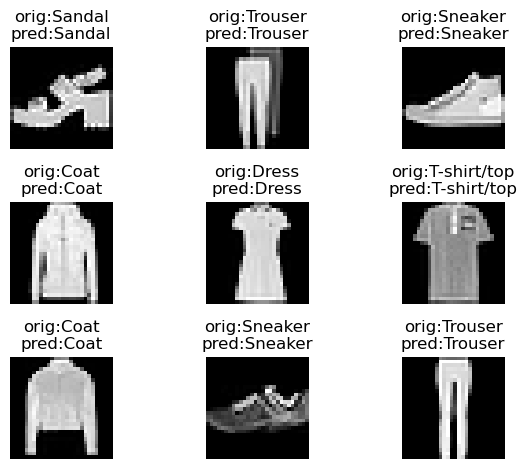

In [210]:
rows = cols = 3
for plt_idx, (img,true,pred) in enumerate(zip(test_samples,test_labels,pred_classes),start=1):
    plt.subplot(rows,cols,plt_idx)
    plt.imshow(img.squeeze(),cmap="gray")
    plt.title(f"orig:{class_names[true]}\npred:{class_names[pred]}")
    plt.axis("off")
plt.tight_layout()
plt.show()